<div class="alert alert-info" role="alert">
 <p class ="lead"> 
 <h1>Física Computacional </h1>
 <h2>Proyecto Final</h2>
 </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1f/Julia_Programming_Language_Logo.svg/1200px-Julia_Programming_Language_Logo.svg.png" style="height:42px;display:inline">

> Autores: Aquino Chapa Martha Abril, Castro Granados Celeste y Rizo Franco Samantha

In [1]:
using Plots
using DataFrames

# Planteamiento del Problema:

Supongamos una astronauta orbitando alrededor de la Tierra que de repente lanza con una fuerza $\vec{F}$ una herramienta hacia el espacio exterior. ¿Se volverán a encontrar en algún momento la astronauta y su herramienta?

# Desarrollo del problema:

Consideraremos un sistema conformado exclusivamente por la Tierra, la astornauta y la herramienta.

Recordemos que la fuerza gravitacional que siente una masa $m_1$ debido a una masa $m_2$ , separadas por una distancia $r$, es:

$$ \vec{F_{12}} = - G \frac{m_1 m_2}{(r_{12})^2} \hat{r_{12}}$$

Con $G$ la constante de gravitación de Newton ($G = 6.67 \times 10^{−11} N m^2/kg^2$) y $\hat{r_{12}}$ el vector unitario con
origen en la partícula 1 y que apunta a la partícula 2.

> *Como nota interesante: los satélites se mantienen en su órbita gracias a un determinado equilibrio de fuerzas. La fuerza de la gravedad, que lo mantiene unido a la Tierra o el objeto sobre el que se mueven, y la inercia del peso, que es la fuerza que tiene el propio satélite que lo empuja fuera de la órbita. Si este equilibrio se rompe, el satélite puede salirse de su órbita.*

Tomaremos a la Tierra como el centro del sistema ya que el movimiento de ésta, causado por la astronauta y la herramienta  es prácticamente nulo debido a que su masa es mucho mayor (lo cual la convierte en sistema de referencia fijo).

Por lo tanto, podemos enfocarnos en análizar solamente el movimiento de la astronauta y de la herramienta a partir de la fuerza gravitacional que siente cada uno de ellos debido a la interacción con los demás cuerpos del sistema. 

Dicho lo anterior, escribimos las ecuaciones de movimiento en el esquema newtoniano: 

1. **Ecuaciones del astronauta:**

Sea $\vec f = m_A \vec{a_A}$ la fuerza con que la astronauta lanza la herramienta, por lo cual, la fuerza sobre la astronauta se describe como

$$ \Rightarrow m_A\ddot{\vec{r}}_A=-\frac{GM_Tm_A}{r_A^2}\hat{r_A}+\frac{Gm_Am_H}{|\vec{r}_A-\vec{r}_H|^2}(\vec{r}_H-\vec{r}_A)-m_A\vec{a}_A$$

Realizamos el siguiente cambio de variable $\tau=\sqrt{GM_T}\ t$ (las unidades de tiempo están en términos de $\tau$) y tenemos que:

$$\frac{d}{d\tau}=\frac{dt}{d\tau}\frac{d}{dt}=\frac{1}{\sqrt{GM_T}}\frac{d}{dt}\quad\quad \Rightarrow \quad\quad \frac{d^2}{d\tau}=\frac{1}{GM_T}\frac{d^2}{dt^2}$$

De esta manera:

$$\frac{1}{GM_T}\frac{d^2\vec{r}_A}{dt^2}=\frac{d^2\vec{r}_A}{d\tau^2}=-\frac{\vec{r}_A}{r_A^3}+\frac{m_H}{M_T}\frac{(\vec{r}_H-\vec{r}_A)}{|\vec{r}_H-\vec{r}_A|^3}-\frac{\vec{a}_A}{GM_T}$$

Ahora, sea $\vec{r}_{HA}=(\vec{r}_H-\vec{r}_A)\Rightarrow$ $r_{HA}$ es la norma de $\vec{r}_{HA}$. 

$$\Rightarrow \frac{d^2\vec{r}_A}{d\tau^2}=-\frac{\vec{r}_A}{r_A^3}+\frac{m_H}{M_T}\frac{\vec{r}_{HA}}{r_{HA}^3}-\frac{\vec{a}_A}{GM_T}$$

Consideramos que el movimiento se realiza en el plano $xy$, por lo tanto:

$$\frac{d^2 x_A}{d\tau^2}=-\frac{x_A}{r_A^3}+\frac{m_H}{M_T}\frac{(x_H-x_A)}{r_{HA}^3}-\frac{a_{AX}}{GM_T}$$
$$\frac{d^2 y_A}{d\tau^2}=-\frac{y_A}{r_A^3}+\frac{m_H}{M_T}\frac{(y_H-y_A)}{r_{HA}^3}-\frac{a_{AY}}{GM_T}$$

2. **Ecuaciones de la herramienta:**

Recordamos primero que la fuerza con la que el astronauta lanza la herramienta es $$\vec{F}_A=m_A\vec{a}_A$$.

Luego, la tercera ley de Newton establece que con toda acción ocurre siempre una reacción igual y contraria: i.e. las acciones mutuas de dos cuerpos siempre son iguales y dirigidas en sentido opuesto, por lo que, sea $\vec{F}_A$ la fuerza que siente el astronauta al lanzar la herramienta y $\vec{F}_H$ la fuerza que siente la herramienta al ser lanzada:
$$ \Rightarrow \vec{F}_A=-\vec{F}_H$$
$$\Rightarrow m_A\vec{a}_A=-m_H\vec{a}_H$$

Por lo que podemos relacionar la aceleración que siente el astronauta con la que siente la herramienta por medio de las siguientes expresiones: 

$$\vec{a}_A=-\frac{m_H\vec{a}_H}{m_A}\quad\quad\wedge\quad\quad \vec{a}_H=-\frac{m_A\vec{a}_A}{m_H}$$

Ahora, seguimos un procedimiento análogo al anterior para escribir las ecuaciones de la herramienta: 

$$ \Rightarrow m_H\ddot{\vec{r}}_H=-\frac{GM_Tm_H}{r_H^2}\hat{r}_H+\frac{Gm_Hm_A}{|\vec{r}_H-\vec{r}_A|^2}(\vec{r}_A-\vec{r}_H)-m_H\vec{a}_H$$

Realizamos nuevamente el cambio de variable $\tau=\sqrt{GM_T}\ t$ (las unidades de tiempo están en términos de $\tau$) y tenemos que:

$$\frac{d}{d\tau}=\frac{dt}{d\tau}\frac{d}{dt}=\frac{1}{\sqrt{GM_T}}\frac{d}{dt}\quad\quad \Rightarrow \quad\quad \frac{d^2}{d\tau}=\frac{1}{GM_T}\frac{d^2}{dt^2}$$

De esta manera:
$$\frac{1}{GM_T}\frac{d^2\vec{r}_H}{dt^2}=\frac{d^2\vec{r}_H}{d\tau^2}=-\frac{\vec{r}_H}{r_H^3}+\frac{m_A}{M_T}\frac{(\vec{r}_A-\vec{r}_H)}{|\vec{r}_A-\vec{r}_H|^3}-\frac{\vec{a}_H}{GM_T}$$

Ahora, sea $\vec{r}_{AH}=(\vec{r}_A-\vec{r}_H) \Rightarrow r_{AH}$ es la norma de $\vec{r_AH}$, y además $r_{AH}=r_{HA}$.

$$\Rightarrow \frac{d^2\vec{r}_H}{d\tau^2}=-\frac{\vec{r}_H}{r_H^3}+\frac{m_A}{M_T}\frac{\vec{r}_{HA}}{r_{HA}^3}-\frac{\vec{a}_H}{GM_T}$$

Consideramos que el movimiento se realiza en el plano $xy$, por lo tanto:

$$\frac{d^2 x_H}{d\tau^2}=-\frac{x_H}{r_H^3}+\frac{m_A}{M_T}\frac{(x_H - x_A)}{r_{HA}^3}-\frac{a_{HX}}{GM_T}$$
$$\frac{d^2 y_H}{d\tau^2}=-\frac{y_H}{r_H^3}+\frac{m_A}{M_T}\frac{(y_H - y_A)}{r_{HA}^3}-\frac{a_{HY}}{GM_T}$$

Con lo anterior, a continuación procedemos a definir la función que nos devuelva las ecuaciones diferenciales de nuestro sistema:

In [2]:
### r=[xA,yA,vxA,vyA,xH,yH,vxH,vyH]
### r= 1, 2,  3,  4,  5, 6, 7,  8
function sistema_AH(r,t,axH,ayH)
    G=6.674e-11 #constante de gravitación universal
    mT=5.972e24 #masa de la Tierra
    mA=70 #masa de la astronauta
    mH=5 #masa de la herramienta
    
    #definimos la aceleracion sobre la astronauta debido al lanzamiento de la herramienta
    axA=-(mH/mA)*axH
    ayA=-(mH/mA)*ayH
    
    #definimos la distancia del astronauta a la Luna
    rA = sqrt(r[1]^2 + r[2]^2)
    #definimos la distancia de la herramienta a la Luna
    rH=sqrt(r[5]^2 + r[6]^2)
    #definimos la distancia del astronauta a la herramienta
    rAH=sqrt((r[1]-r[5])^2 + (r[2]-r[6])^2)
    
    #Ecuaciones del astronauta
    vxA = r[3]
    dvxA = -( r[1]/(rA^3) )+( (mH/mT)*((r[5]-r[1])/(rAH^3)) )+(axA/(G*mT))
    
    vyA = r[4]
    dvyA = -( r[2]/(rA^3) )+( (mH/mT)*((r[6]-r[2])/(rAH^3)) )+(ayA/(G*mT))
    #Ecuaciones de la herramienta
    vxH=r[7]
    dvxH = -( r[5]/(rH^3) )-( (mA/mT)*((r[5]-r[1])/(rAH^3)) )+(axH/(G*mT))
    
    vyH=r[8]
    dvyH = -( r[6]/(rH^3) )-( (mA/mT)*((r[6]-r[2])/(rAH^3)) )+(ayH/(G*mT))
    
    return([vxA,vyA,dvxA,dvyA,vxH,vyH,dvxH,dvyH])
end    

sistema_AH (generic function with 1 method)

Y definimos también la función del método de Runge-Kutta de orden, 4 vista en clase para poder resolver nuestro sistema de ecuaciones diferenciales. En el ***Notebook 10*** vimos que la implementación del algoritmo anterior se realiza con la siguiente función:

In [3]:
#Añadimos como parametros axH y ayH para que concuerde con los parámetros de la edo que representa nuestro sistema
function RK_4(edo,x_ini,t,axH,ayH) 
    sol = zeros( length(t) , length(x_ini) )
    sol[1,:] .= x_ini
    δ = t[2]-t[1]
    for i in 1:length(t)-1
        k1 = edo(sol[i,:],t[i],axH,ayH)
        k2 = edo(sol[i,:] .+ 0.5*δ.*k1 , t[i] + 0.5*δ,axH,ayH)
        k3 = edo(sol[i,:] .+ 0.5*δ.*k2 , t[i] + 0.5*δ,axH,ayH)
        k4 = edo(sol[i,:] .+ δ.*k2 , t[i] + δ,axH,ayH)
        sol[i+1,:] .= sol[i,:] .+ (δ/6.0).*(k1 .+ 2.0.*k2 .+ 2.0.*k3 .+ k4)
    end
    return sol
end

RK_4 (generic function with 1 method)

## Definición de las condiciones iniciales:

### a) Posiciones iniciales: $r_A$ y $r_H$

Ahora, supondremos que la astronauta se encuentra a una altura de $r_A = 350 km$ desde la superficie de la Tierra (altura aproximada de una órbita estable) y la herramienta a $r_H = 350.00065km$ (65 cm más que corresponde al largo promedio de un brazo).

Por lo que, considerando que el radio de la Tierra es aproximadamente 6371km, tenemos que:

$$\frac{r_A+r_T}{r_T}=\frac{350km+6371 km}{6371 km}=1.0549364307016167 $$
$$\frac{r_H+r_T}{r_T}=\frac{350.00065km+6371 km}{6371 km}=1.0549365327264166 $$

Por lo tanto, tenemos que el radio del astronauta es $1.0549364307016167$ veces el radio de la Tierra y el radio de la herramienta es $1.0549365327264166$ veces el radio de la Tierra. 

Con esto, procedemos a definir los radios:

In [4]:
rA_sf=1.0549364307016167*6371  #sf significa sin factor
rH_sf=1.0549365327264166*6371

6721.00065

Luego, recordamos que en el planteamiento de las ecuaciones hicimos el cambio de variable $\tau=\sqrt{GM_T}\ t$, por lo tanto, hay que multiplicar los radios anteriores por un factor $1/\sqrt{GM_T}$ para contrarrestarlo y poder meter dichos datos al sistema. 

En donde $M_T$ es la masa de la tierra. 

In [5]:
G=6.674e-11 #constante de gravedad
mT=5.972e24 #masa de la Tierra
rA_cf=rA_sf/(sqrt(G*mT)) #cf significa que ya fueron multiplicados por el factor: con factor
rH_cf=rH_sf/(sqrt(G*mT))

0.00033665179676993767

Observamos que los valores que obtuvimos son muy pequeños, por lo tanto, es recomendable normalizarlos para visualizar de mejor manera las gráficas que haremos después. Tomaremos como factor de normalizacion $1/rA_{cf}$ y de ese modo, al final tendremos que $rA=1$

In [6]:
n=1/rA_cf #factor de normalizacion

2970.428514882344

Y ahora sí ya podemos definir nuestros radios. 

In [7]:
rA=rA_cf*n
rH=rH_cf*n
println(rA)
println(rH)

0.9999999999999999
1.0000000967117988


### b) Velocidades iniciales: 

Supongamos que tanto el astronauta como la herramienta empiezan en una posicion $(x,0$) en donde $x$ corresponderá a la altura, es decir, los radios definidos arriba. 

Como condición inicial de la velocidad utilizaremos la velocidad órbital que es la velocidad aproximada a la que debe estar la astronauta para que su órbita sea estable considerando su altura. Para deducir está velocidad recordemos que la fuerza de gravedad es una fuerza de aceleración centrípeta (está dirigida hacia el centro de curvatura de la trayectoria):

$$F_{gravedad}=F_{centrípeta}$$
$$\Rightarrow \frac{GM_Tm}{r^{2}}={m}\frac{v^{2}}{r}$$
Despejamos la velocidad para obtener la velocidad órbital:
$$\Rightarrow v_{órbital}=\sqrt{\frac{GM_T}{r}}$$
Donde $G$ es la constante gravitacional, $M_T$ es la masa de la Tierra y $r$ es el radio de la órbita. Podemos ver que la velocidad de órbita es independiente de la masa del objeto en órbita (ya sea la astronauta o la herramienta).

Luego, realizamos nuevamente el cambio de variable $\tau=\sqrt{GM_T} \ t$ (las unidades de tiempo están en términos de $\tau$) y tenemos que:

$$\frac{d}{d\tau}=\frac{dt}{d\tau}\frac{d}{dt}=\frac{1}{\sqrt{GM_T}}\frac{d}{dt}$$

De esta manera:
$$\Rightarrow \frac{d}{d\tau}r_{órbital}=\frac{dt}{d\tau}\frac{d}{dt}r_{órbital}=\frac{1}{\sqrt{GM_T}}\sqrt{\frac{GM_T}{r}}$$
$$\therefore v_{órbital}=\frac{1}{\sqrt{r}}$$
Finalmente, dejaremos correr la simulación un tiempo $\tau=2\pi$ que representa 1 ciclo de la astronauta a una distancia unitaria de la Tierra (por eso normalizamos antes).

## Solución del problema: 

Obtendremos la solución utilizando todas las consideraciones mencionadas arriba.

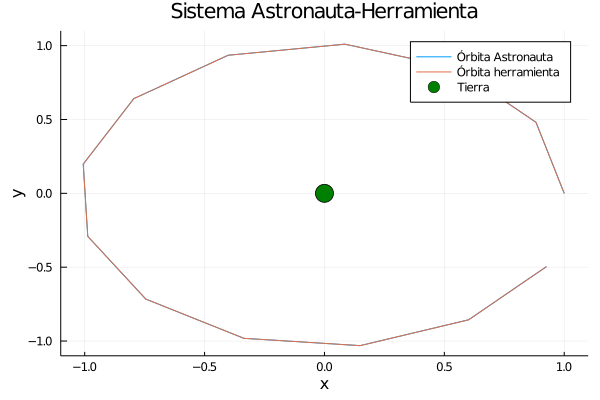

In [8]:
#Definimos el tiempo donde correrá la simulación
tiempo=collect(0:0.5:2*π)
#Condiciones iniciales para la astronauta
xA,yA,vxA,vyA = rA, 0.0, 0.0, 1/sqrt(rA)
#Condiciones iniciales para la herramienta
xH,yH,vxH,vyH = rH, 0.0, 0.0, 1/sqrt(rH)
cond_inic = [xA,yA,vxA,vyA,xH,yH,vxH,vyH]
#Obtenemos las soluciones
solucion=RK_4(sistema_AH,cond_inic,tiempo,100,100)

#solucion=[xA,yA,vxA,vyA,xH,yH,vxH,vyH]

plot(title="Sistema Astronauta-Herramienta",xlabel="x",ylabel="y")
plot!(solucion[:,1],solucion[:,2], label="Órbita Astronauta",lw=1.0)
plot!(solucion[:,5],solucion[:,6], label="Órbita herramienta",lw=1.0)
scatter!([0],[0],markershape=:circle,markersize=10,markercolor=:green,label="Tierra",xlim=(-1.1,1.1),ylim=(-1.1,1.1))

Para ver la precisión de la solución utilizaremos el método de Runge-Kutta de segundo orden con el objetivo de comparar la solución de orden 4 (que es la que tenemos) con la de orden 2.  Por lo tanto, definimos la función RK_2 que implementa el método de Runge-Kutta de segundo orden.

In [9]:
function RK_2(edo,x_ini,t,axH,ayH)
    sol = zeros( length(t) , length(x_ini) )
    sol[1,:] .= x_ini
    δ = t[2]-t[1]
    for i in 1:length(t)-1
        k1 = sol[i,:] .+ 0.5*δ .*edo(sol[i,:],t[i],axH,ayH)
        sol[i+1,:] .= sol[i,:] .+ δ*edo(k1,t[i]+0.5*δ,axH,ayH)
    end
    return sol
end

RK_2 (generic function with 1 method)

Y para comparar ambas soluciones, anexaremos una función que obtenga la diferencia máxima entre dichas soluciones, a cada tiempo, usandos los dos diferentes métodos.

In [10]:
#Pedimos dos soluciones
function variacion(sol1,sol2)
    #Guardamos la información de las posiciones de la herramienta y la astronauta para la primera solución.
    x1A=sol1[:,1]
    y1A=sol1[:,2]
    x1H=sol1[:,5]
    y1H=sol1[:,5]
    #Guardamos la información de las posiciones de la herramienta y la astronauta para la segunda solución.
    x2A=sol2[:,1]
    y2A=sol2[:,2]
    x2H=sol2[:,5]
    y2H=sol2[:,5]
    #Definimos los arreglos donde anexaremos la diferencia en soluciones a cada tiempo
    xA=[]
    yA=[]
    xH=[]
    yH=[]
    #Hacemos un ciclo donde iremos anexando las diferencias de cada solución
    for i in 1:length(sol1[:,1])
        push!(xA,abs(x1A[i]-x2A[i]))
        push!(yA,abs(y2A[i]-y1A[i]))
        push!(xH,abs(x1H[i]-x2H[i]))
        push!(yH,abs(y1H[i]-y2H[i]))
    end
    #Definimos el arreglo donde anexamos el máximo de cada una de las diferencias en las soluciones 
    dif=[maximum(xA),maximum(yA),maximum(xH),maximum(yH)]
    #Obtenemos la diferencia máxima
    max=maximum(dif)
    return max
end

variacion (generic function with 1 method)

Usando las condiciones inciales y tiempo expresados anteriormente, obtenemos esta variación entre las soluciones:

In [11]:
variacion(RK_4(sistema_AH,cond_inic,tiempo,100,100),RK_2(sistema_AH,cond_inic,tiempo,100,100))

0.6184469676851649

Notamos que la diferencia entre las soluciones es sumamente grande para un paso de 0.5 en el intervalo de tiempo, por lo tanto, tomaremos un paso más fino, por ejemplo 0.002:

In [12]:
tiempo_refinado=collect(0:0.002:2*π)
variacion(RK_4(sistema_AH,cond_inic,tiempo_refinado,100,100),RK_2(sistema_AH,cond_inic,tiempo_refinado,100,100))

1.4685537445040253e-5

Con ello, ahora se tiene una diferencia máxima de 0.0002, que implica una correspondencia de precisión $10^{-3}$ con la solución de orden 2. A continuación, gráfiquemos la órbita de la herramienta y la astronauta considerando el paso en el intervalo del tiempo más refinado:

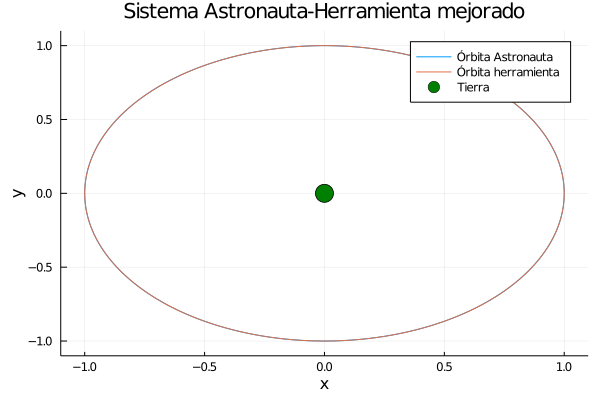

In [19]:
solucion_refinada=RK_4(sistema_AH,cond_inic,tiempo_refinado,100,100)

#solucion=[xA,yA,vxA,vyA,xH,yH,vxH,vyH]

plot(title="Sistema Astronauta-Herramienta mejorado",xlabel="x",ylabel="y")
plot!(solucion_refinada[:,1],solucion_refinada[:,2], label="Órbita Astronauta",lw=1.0)
plot!(solucion_refinada[:,5],solucion_refinada[:,6], label="Órbita herramienta",lw=1.0)
scatter!([0],[0],markershape=:circle,markersize=10,markercolor=:green,label="Tierra",xlim=(-1.1,1.1),ylim=(-1.1,1.1))

Observamos que pese a que la astronauta lanza su herramienta, no hay gran cambio en la órbita de ambos objetos. Podemos atribuir esto a que la fuerza que siente cada uno de ellos, no es comparable con la ejercida por la Tierra y termina siendo despreciable. Sin embargo, esto no implica que la astronauta pueda volver a tomar su herramienta ya que podrían tener las mismas órbitas pero la herramienta podría no estar a una distancia apropiada para tomarla a cierto tiempo. A parte es importante destacar que debido a nuestra normalización, una unidad en nuestra gráfica equivale aproximadamente a $6371km$ por lo cual aunque el astronauta la lance la herramienta con una gran fuerza alcanzando una gran aceleración (humanamente posible) será imposible apreciarlo en la gráfica. 
Sin embargo, aunque no nos sea posible apreciar graficamente una diferencia en la órbita, no significa que la astronauta pueda volver a tomar su herramienta, así, definimos unas funciones que nos permitan saber en que momentos (si los hay), y lugares en el espacio la astronauta podrá volver a recuperar su herramienta.

Iniciamos con la función que nos permita conocer después de que tiempo $\tau$ podrá obtenerla.

In [14]:
function interseccion_t(rAx,rAy,rHx,rHy,t)
    #Definimos la distancia maxima que puede haber entre la herramienta y la astronauta, la cual es el largo de un brazo
    #promedio, esto con la finalidad de que logré atraparla en la trayectoria. (normalizada a nuestra escala)
    distancia=1.0202479987443101e-7
    #creamos un arreglo vacío donde anexaremos los tiempos donde la astronauta puede volver a tomar su herramienta.
    tiempo_interseccion=[]
    for i in 1:length(t)
        #Si la distancia entre la herramienta es menor o igual a la distancia
        if ((rAx[i]-rHx[i])^2 + (rAy[i]-rHy[i])^2)<=distancia^2
            #Pedimos al programa que anexe el tiempo en que podrá tomar su herrmienta
            push!(tiempo_interseccion,t[i])
        else
            #Si no puede tomar su herramienta descartamos el tiempo
            false
        end
            
    end
    #Regresamos los tiempos donde podrá tomar su herramienta.
    return tiempo_interseccion
end

interseccion_t (generic function with 1 method)

Ahora para la coordenada x.

In [15]:
function interseccion_x(rAx,rAy,rHx,rHy,t)
    #Definimos la distancia maxima que puede haber entre la herramienta y la astronauta, la cual es el largo de un brazo
    #promedio, esto con la finalidad de que logré atraparla en la trayectoria.
    distancia=1.0202479987443101e-7
    #creamos un arreglo vacío donde anexaremos los posiciones de la astronauta donde puede volver a tomar su herramienta.
    px=[]
    #Realizamos un ciclo donde compararemos las posiciones en x y y de la herramienta y la astronauta
    for i in 1:length(t)
        #Si la distancia entre la herramienta es menor o igual a la distancia
        if ((rAx[i]-rHx[i])^2 + (rAy[i]-rHy[i])^2)<=distancia^2
            #Pedimos al programa que anexe el tiempo en que podrá tomar su herrmienta
            push!(px,rAx[i])
        else
            #Si no puede tomar su herramienta descartamos el tiempo
            false
        end
            
    end
    #Regresamos los tiempos donde podrá tomar su herramienta.
    return px
end

interseccion_x (generic function with 1 method)

Para la coordenada y

In [16]:
function interseccion_y(rAx,rAy,rHx,rHy,t)
    #Definimos la distancia maxima que puede haber entre la herramienta y la astronauta, la cual es el largo de un brazo
    #promedio, esto con la finalidad de que logré atraparla en la trayectoria.
    distancia=1.0202479987443101e-7
    #creamos un arreglo vacío donde anexaremos los posiciones de la astronauta donde puede volver a tomar su herramienta.
    py=[]
    #Realizamos un ciclo donde compararemos las posiciones en x y y de la herramienta y la astronauta
    for i in 1:length(t)
        #Si la distancia entre la herramienta es menor o igual a la distancia
        if ((rAx[i]-rHx[i])^2 + (rAy[i]-rHy[i])^2)<=distancia^2
            #Pedimos al programa que anexe el tiempo en que podrá tomar su herrmienta
            push!(py,rAy[i])
        else
            #Si no puede tomar su herramienta descartamos el tiempo
            false
        end
    end
    #Regresamos los tiempos donde podrá tomar su herramienta.
    return py
end

interseccion_y (generic function with 1 method)

Con lo annterior, determinemos los tiempos donde la astronauta podría tomar su herramienta.

In [20]:
datos_t1=interseccion_t(solucion_refinada[:,1],solucion_refinada[:,2],solucion_refinada[:,5],solucion_refinada[:,6],tiempo_refinado)
datos_x1=interseccion_x(solucion_refinada[:,1],solucion_refinada[:,2],solucion_refinada[:,5],solucion_refinada[:,6],tiempo_refinado)
datos_y1=interseccion_y(solucion_refinada[:,1],solucion_refinada[:,2],solucion_refinada[:,5],solucion_refinada[:,6],tiempo_refinado)
DataFrame(τ=datos_t1,Px=datos_x1,Py=datos_y1)

,τ,Px,Py
,Any,Any,Any
1,0.0,1.0,0.0
2,0.002,0.999998,0.002
3,0.004,0.999992,0.00399999
4,0.006,0.999982,0.00599996
5,0.008,0.999968,0.00799991
6,0.01,0.99995,0.00999983
7,0.012,0.999928,0.0119997
8,0.014,0.999902,0.0139995
9,0.016,0.999872,0.0159993


Graficando las posicines donde podrá tomar su herramienta, en la órbita de la astronauta.

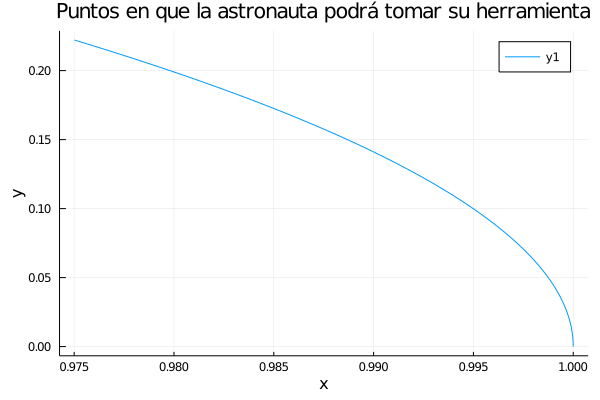

In [21]:
plot(title="Puntos en que la astronauta podrá tomar su herramienta",xlabel="x",ylabel="y")
plot!(datos_x1,datos_y1)

Apreciamos que, pese a que las órbitas de la herramienta y la astronauta parecen ser las mismas (por la escala), no siempre podrá tomar su herramienta, sólamente en esos puntos, tomando en cuenta 1 ciclo de su órbita.

Como extra, veamos como es el movimiento de nuestra astronauta y la herramienta.

┌ Info: Saved animation to 
│   fn = C:\Users\marth\Fisica computacional\Fisica-computacional\orbita.gif
└ @ Plots C:\Users\marth\.julia\packages\Plots\hooUV\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\marth\\Fisica computacional\\Fisica-computacional\\orbita.gif")
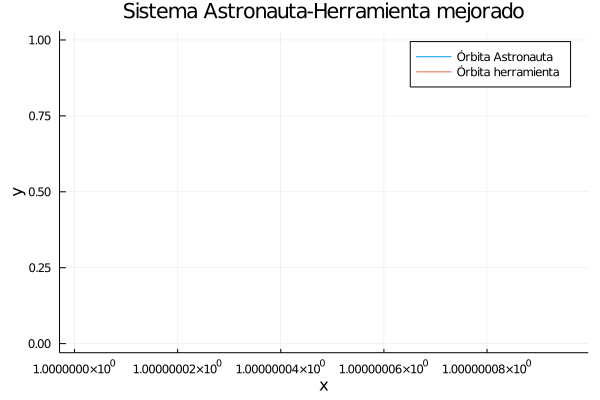

In [23]:
tiempo_animacion=collect(0:0.002:2.1*π)
solucion_animacion=RK_4(sistema_AH,cond_inic,tiempo_animacion,100,100)
tiempos=collect(1:50:length(tiempo_animacion))
mi_peli=@animate for i in tiempos
    plot(title="Sistema Astronauta-Herramienta mejorado",xlabel="x",ylabel="y")
    plot!(solucion_animacion[1:i,1],solucion_animacion[1:i,2],label="Órbita Astronauta",lw=1.0)
    plot!(solucion_animacion[1:i,5],solucion_animacion[1:i,6],label="Órbita herramienta",lw=1.0)
end
#Se puede comentar esto si no se quiere descargar la imagen como gift
gif(mi_peli,"orbita.gif",fps=5)

## c) Usando una aceleración muy grande

Sólo para comprobar que las oscilaciones no son iguales, supondremos que la astronauta dispara con una resortera la herramienta talque $a_{xH}=100$ y $a_{yH}=1000000000000$, sin embargo primero análicemos la presición de la solución.

In [30]:
variacion(RK_2(sistema_AH,cond_inic,tiempo_refinado,100,1000000000000),RK_4(sistema_AH,cond_inic,tiempo_refinado,100,1000000000000))

1.4703436338615872e-5

Apreciamos que la variación entre soluciones es pequeña, así que procedemos a hacer el análisis con la nueva aceleración

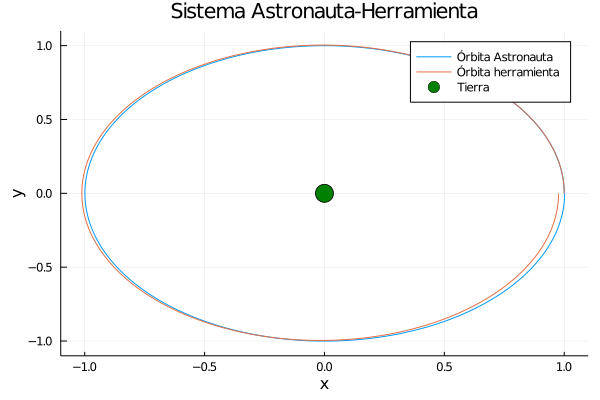

In [32]:
solucion_refinada2=RK_4(sistema_AH,cond_inic,tiempo_refinado,100,1000000000000)

#solucion=[xA,yA,vxA,vyA,xH,yH,vxH,vyH]

plot(title="Sistema Astronauta-Herramienta",xlabel="x",ylabel="y")
plot!(solucion_refinada2[:,1],solucion_refinada2[:,2], label="Órbita Astronauta",lw=1.0)
plot!(solucion_refinada2[:,5],solucion_refinada2[:,6], label="Órbita herramienta",lw=1.0)
scatter!([0],[0],markershape=:circle,markersize=10,markercolor=:green,label="Tierra",xlim=(-1.1,1.1),ylim=(-1.1,1.1))

Podemos notar que si la herramienta tuviera una gran aceleración inicial sus orbitas serían sumamente distintas (hablamos de kilometros de diferencia.
Con ello en mente, definimos una función que compare las posiciones en el eje $x$ y $y$ de la herramienta y la astronauta, para conocer si su distancia será menor a la longitud de su brazo, y por tanto poder tomarla.

Ahora análicemos cuando la astronauta podrá volver a tomar su herramienta.

In [31]:
datos_t2=interseccion_t(solucion_refinada2[:,1],solucion_refinada2[:,2],solucion_refinada2[:,5],solucion_refinada2[:,6],tiempo_refinado)
datos_x2=interseccion_x(solucion_refinada2[:,1],solucion_refinada2[:,2],solucion_refinada2[:,5],solucion_refinada2[:,6],tiempo_refinado)
datos_y2=interseccion_y(solucion_refinada2[:,1],solucion_refinada2[:,2],solucion_refinada2[:,5],solucion_refinada2[:,6],tiempo_refinado)
DataFrame(τ=datos_t2,Px=datos_x2,Py=datos_y2)

,τ,Px,Py
,Any,Any,Any
1,0.0,1.0,0.0
2,0.002,0.999998,0.002
3,0.004,0.999992,0.00399999


Vemos que los puntos son muy pocos, así que grafiquemoslos para tener una imágen más visual.

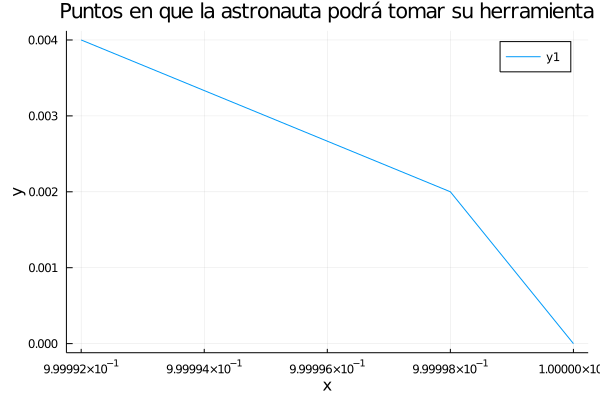

In [34]:
plot(title="Puntos en que la astronauta podrá tomar su herramienta",xlabel="x",ylabel="y")
plot!(datos_x2,datos_y2)

Apreciamos entonces que nuestra astronauta podrá recuperar su herramienta en múltiples tiempos $\tau$. Sin embargo está función no nos da el tiempo en segundos, así que modifiquemos la función para obtener el tiempo en segundos, ya que el reloj de nuestra astronauta está en SI.

Observamos que la astronauta prodrá atrapar a su herramienta en múltiples tiempos, sin embargo tendrá que ser rápida ya que esto será a tiempo muy pequeños.

Vamos a definir también una función que nos permita obtener los radios tal como los necesitamos, con el objetivo de resolver el problema para distintas condiciones iniciales sin tener que andar realizando todos los cálculos cada vez. A esta función le entregaremos la distancia del astronauta desde la superficie terreste y nos devolverá el radio del astronauta respecto al centro de la Tierra y de la herramienta también respecto al centro de la Tierra, ambos ya multiplicados por el factor del cambio de variable y normalizados.   

In [105]:
function distancias(r_A)
    G=6.674e-11 #Constante gravitacional
    mT=5.972e24 #Masa de la Tierra
    r_H=r_A+0.00065 #El radio de la herramienta inicialmente es el radio de la astronauta más la distancia de su brazo
    
    #Definimos la proporcion de la posicion del astronauta respecto al radio de la Tierra
    rA_proporcion=(r_A+6371)/6371
    rH_proporcion=(r_H+6371)/6371
    
    rA_sf=rA_proporcion*6371  #sf significa sin factor
    rH_sf=rH_proporcion*6371
    
    #Multiplicamos por 1/τ (factor del cambio de variable):
    
    rA_cf=rA_sf/(sqrt(G*mT)) #cf significa que ya fueron multiplicados por el factor: con factor
    rH_cf=rH_sf/(sqrt(G*mT))
    
    #Los normalizamos:
    
    normalizacion=1/rA_cf #factor de normalizacion
    
    rA=rA_cf*normalizacion
    rH=rH_cf*normalizacion
    
    return rA,rH
end

distancias (generic function with 1 method)

In [106]:
rT=distancias(6371) #este seria el tamaño de la tierra para ponerlo en la grafica y que se aprecie

(1.0, 1.0000000510123999)

Finalmente, con la función anterior, obtendremos la solución para distintas condiciones iniciales:

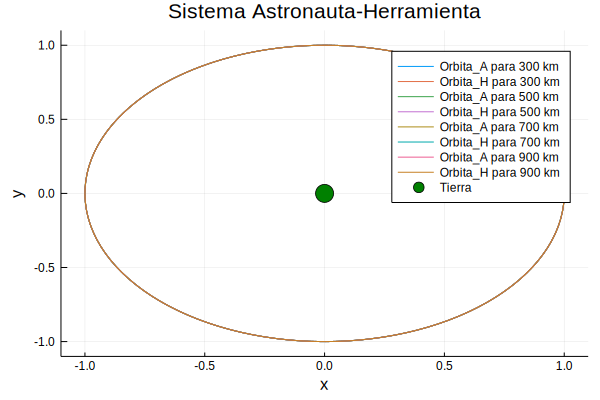

In [124]:
tiempo=collect(0:0.05:4*π)
plot(title="Sistema Astronauta-Herramienta",xlabel="x",ylabel="y")
for i in 300:200:1000
    sol=distancias(i)
    xA,yA,vxA,vyA = sol[1], 0.0, 0.0, 1/sqrt(sol[1])
    xH,yH,vxH,vyH = sol[2], 0.0, 0.0, 1/sqrt(sol[2])
    cond_inic = [xA,yA,vxA,vyA,xH,yH,vxH,vyH]
    solucion=RK_4(sistema_AH,cond_inic,tiempo,100,100)

    plot!(solucion[:,1],solucion[:,2], label="Orbita_A para $i km",lw=1.0)
    plot!(solucion[:,5],solucion[:,6], label="Orbita_H para $i km",lw=1.0)
end
scatter!([0],[0],markershape=:circle,markersize=10,markercolor=:green,label="Tierra",xlim=(-1.1,1.1),ylim=(-1.1,1.1))

Gráfica con diferente escala para apreciar la diferencia entre las órbitas:

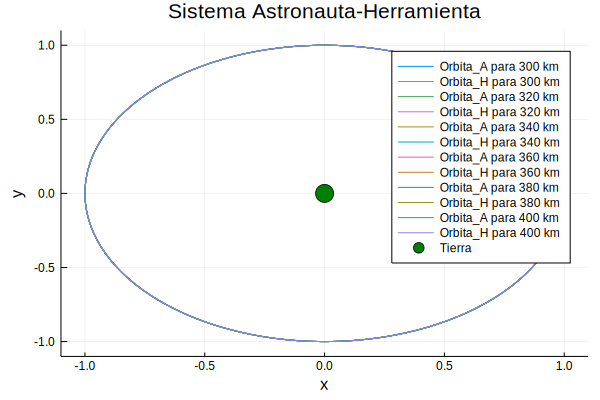

In [87]:
tiempo=collect(0:0.05:4*π)
plot(title="Sistema Astronauta-Herramienta",xlabel="x",ylabel="y")
for i in 300:20:400
    sol=distancias(i)
    xA,yA,vxA,vyA = sol[1], 0.0, 0.0, 1/sqrt(sol[1])
    xH,yH,vxH,vyH = sol[2], 0.0, 0.0, 1/sqrt(sol[2])
    cond_inic = [xA,yA,vxA,vyA,xH,yH,vxH,vyH]
    solucion=RK_4(sistema_AH,cond_inic,tiempo,100,100)

    plot!(solucion[:,1],solucion[:,2], label="Orbita_A para $i km",lw=1.0)
    plot!(solucion[:,5],solucion[:,6], label="Orbita_H para $i km",lw=1.0)
end
plot!(xlim=(-1.1,1.1),ylim=(-1.1,1.1))
scatter!([0],[0],markershape=:circle,markersize=10,markercolor=:green,label="Tierra",xlim=(-1.1,1.1),ylim=(-1.1,1.1))

Se siguen viendo igual xddd

## Generalización del problema

Es posible generalizar el problema a un sistema con masas diferentes, siempre y cuando la masa del elemento que fungirá como centro de referencia, sea tal que las contribuciones en fuerza debidas a los otros dos objetos sea despreciables para tener un centro de referencia fijo.
Usando parámetros normalizados al sistema, las funciones que se utilizarian será:

In [44]:
### r=[xA,yA,vxA,vyA,xH,yH,vxH,vyH]
### r= 1, 2,  3,  4,  5, 6, 7,  8
### m1 masa del objeto de sistema de referencia
### m2 y m3 masa de los otros dos objetos
function sistema_general(r,t,axH,ayH,m1,m2,m3)
    G=6.674e-11 #constante de gravitación universal
    mT=m1 #masa de la Tierra
    mA=m2 #masa de la astronauta
    mH=m3 #masa de la herramienta
    
    #definimos la aceleracion sobre la astronauta debido al lanzamiento de la herramienta
    axA=-(mH/mA)*axH
    ayA=-(mH/mA)*ayH
    
    #definimos la distancia del astronauta a la Luna
    rA = sqrt(r[1]^2 + r[2]^2)
    #definimos la distancia de la herramienta a la Luna
    rH=sqrt(r[5]^2 + r[6]^2)
    #definimos la distancia del astronauta a la herramienta
    rAH=sqrt((r[1]-r[5])^2 + (r[2]-r[6])^2)
    
    #Ecuaciones del astronauta
    vxA = r[3]
    dvxA = -( r[1]/(rA^3) )+( (mH/mT)*((r[5]-r[1])/(rAH^3)) )+(axA/(G*mT))
    
    vyA = r[4]
    dvyA = -( r[2]/(rA^3) )+( (mH/mT)*((r[6]-r[2])/(rAH^3)) )+(ayA/(G*mT))
    #Ecuaciones de la herramienta
    vxH=r[7]
    dvxH = -( r[5]/(rH^3) )-( (mA/mT)*((r[5]-r[1])/(rAH^3)) )+(axH/(G*mT))
    
    vyH=r[8]
    dvyH = -( r[6]/(rH^3) )-( (mA/mT)*((r[6]-r[2])/(rAH^3)) )+(ayH/(G*mT))
    
    return([vxA,vyA,dvxA,dvyA,vxH,vyH,dvxH,dvyH])
end  

sistema_general (generic function with 1 method)

La función de Runge-Kutta de 4to orden para el sistema generalizado.

In [35]:
#Añadimos como parametros axH y ayH para que concuerde con los parámetros de la edo que representa nuestro sistema
function RK_4_general(edo,x_ini,t,axH,ayH,m1,m2,m3) 
    sol = zeros( length(t) , length(x_ini) )
    sol[1,:] .= x_ini
    δ = t[2]-t[1]
    for i in 1:length(t)-1
        k1 = edo(sol[i,:],t[i],axH,ayH,m1,m2,m3)
        k2 = edo(sol[i,:] .+ 0.5*δ.*k1 , t[i] + 0.5*δ,axH,ayH,m1,m2,m3)
        k3 = edo(sol[i,:] .+ 0.5*δ.*k2 , t[i] + 0.5*δ,axH,ayH,m1,m2,m3)
        k4 = edo(sol[i,:] .+ δ.*k2 , t[i] + δ,axH,ayH,m1,m2,m3)
        sol[i+1,:] .= sol[i,:] .+ (δ/6.0).*(k1 .+ 2.0.*k2 .+ 2.0.*k3 .+ k4)
    end
    return sol
end

RK_4_general (generic function with 1 method)

Problemos lo anterior pero ahora tomando en cuenta la masa de la luna en vez de la de la Tierra, tomando las condiciones del sistema 1 utilizado.

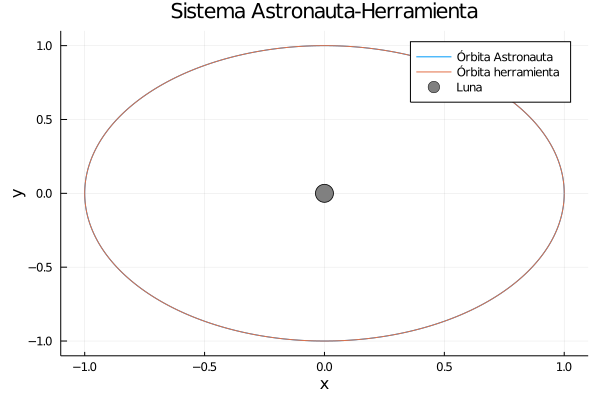

In [46]:
#Definimos el tiempo donde correrá la simulación
tiempo_general=collect(0:0.002:2π)
#Condiciones iniciales para la astronauta
xA,yA,vxA,vyA = rA, 0.0, 0.0, 1/sqrt(rA)
#Condiciones iniciales para la herramienta
xH,yH,vxH,vyH = rH, 0.0, 0.0, 1/sqrt(rH)
cond_inic = [xA,yA,vxA,vyA,xH,yH,vxH,vyH]
#Obtenemos la solución
solucion_general=RK_4_general(sistema_general,cond_inic,tiempo_general,100,100,7e22,70,5)

#solucion=[xA,yA,vxA,vyA,xH,yH,vxH,vyH]

plot(title="Sistema Astronauta-Herramienta",xlabel="x",ylabel="y")
plot!(solucion_general[:,1],solucion_general[:,2], label="Órbita Astronauta",lw=1.0)
plot!(solucion_general[:,5],solucion_general[:,6], label="Órbita herramienta",lw=1.0)
scatter!([0],[0],markershape=:circle,markersize=10,markercolor=:grey,label="Luna",xlim=(-1.1,1.1),ylim=(-1.1,1.1))

Los puntos donde la astronauta podrá recuperar su herramienta:

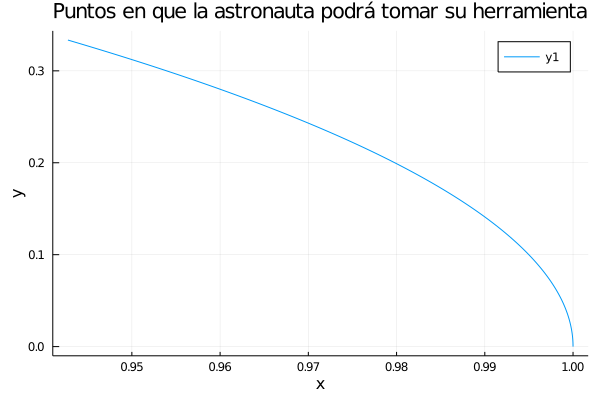

In [48]:
datos_generalt=interseccion_t(solucion_general[:,1],solucion_general[:,2],solucion_general[:,5],solucion_general[:,6],tiempo_general)
datos_generalx=interseccion_x(solucion_general[:,1],solucion_general[:,2],solucion_general[:,5],solucion_general[:,6],tiempo_general)
datos_generaly=interseccion_y(solucion_general[:,1],solucion_general[:,2],solucion_general[:,5],solucion_general[:,6],tiempo_general)
plot(title="Puntos en que la astronauta podrá tomar su herramienta",xlabel="x",ylabel="y")
plot!(datos_generalx,datos_generaly)

# ¿Se puede borrar estas celdas?

Ahora si, obtengamos el tiempo después de que la astronauta lanzó su herramienta hasta que puede volver a atraparla. Iniciamos normalizando la longitud promedio del un brazo humano para poder comparar con la escala y unidades que se estan utilizando.

In [16]:
.00065/6371 #normalizamos la longitud promedio del brazo 

1.0202479987443101e-7

In [156]:
#Aun no queda chido
function interseccion_coordenadas(rAx,rAy,rHx,rHy,t)
    #Definimos la distancia maxima que puede haber entre la herramienta y la astronauta, la cual es el largo de un brazo
    #promedio, esto con la finalidad de que logré atraparla en la trayectoria.
    distancia=1.0202479987443101e-7
    #creamos un arreglo vacío donde anexaremos los tiempos donde la astronauta puede volver a tomar su herramienta.
    coordenada_interseccion=[]
    #Realizamos un ciclo donde compararemos las posiciones en x y y de la herramienta y la astronauta
    for i in 1:length(t)
        #Si la distancia entre la herramienta es menor o igual a la distancia
        if ((rAx[i]-rHx[i])^2 + (rAy[i]-rHy[i])^2)<=distancia^2
            return rAx,rAy
        else
            #Si no puede tomar su herramienta descartamos el tiempo
            false
        end
            
    end 
    #Regresamos los tiempos donde podrá tomar su herramienta.
    return  interseccion_coordenadas
end

interseccion_coordenadas (generic function with 1 method)

In [157]:
#Aun no queda chido
interseccion_coordenadas(solucion_refinada[:,1],solucion_refinada[:,2],solucion_refinada[:,5],solucion_refinada[:,6],tiempo_refinado)

([1.0, 0.999998, 0.999992, 0.999982, 0.999968, 0.99995, 0.999928, 0.999902, 0.999872, 0.999838  …  0.999831, 0.999866, 0.999897, 0.999923, 0.999946, 0.999965, 0.99998, 0.99999, 0.999997, 1.0], [0.0, 0.002, 0.00399999, 0.00599996, 0.00799991, 0.00999983, 0.0119997, 0.0139995, 0.0159993, 0.017999  …  -0.0183697, -0.01637, -0.0143702, -0.0123704, -0.0103705, -0.00837059, -0.00637065, -0.00437068, -0.00237069, -0.000370691])

In [164]:
#Creo que se puede omitir esta función debido a que ya se implemento los puntos
#donde puede tomar su herramienta
function interseccion_s(rAx,rAy,rHx,rHy,t)
    #Las constantes que usaremos
    G=6.674e-11 #constante de gravedad
    mT=5.972e24
    #La constante de proporcionalidad entre segundos y tau
    SI=1/(sqrt(G*mT))
    #Definimos la distancia maxima que puede haber entre la herramienta y la astronauta, la cual es el largo de un brazo
    #promedio, esto con la finalidad de que logré atraparla en la trayectoria.
    distancia=1.0202479987443101e-7
    #creamos un arreglo vacío donde anexaremos los tiempos donde la astronauta puede volver a tomar su herramienta.
    tiempo_interseccion=[]
    #Realizamos un ciclo donde compararemos las posiciones en x y y de la herramienta y la astronauta
    for i in 1:length(t)
        #Si la distancia entre la herramienta es menor o igual a la distancia
        if ((rAx[i]-rHx[i])^2 + (rAy[i]-rHy[i])^2)<=distancia^2
            #Definimos el tiempo tau[i] y le aplicamos el cambio de unidades
            tiempo=t[i]*SI
            #Pedimos al programa que anexe el tiempo en SI en que podrá tomar su herrmienta
            push!(tiempo_interseccion,tiempo)
        else
            #Si no puede tomar su herramienta descartamos el tiempo
            false
        end
            
    end
    #Regresamos los tiempos donde podrá tomar su herramienta.
    return tiempo_interseccion
end

interseccion_s (generic function with 1 method)